In [175]:
import spotipy
import spotipy.oauth2 as oauth2
import pandas as pd

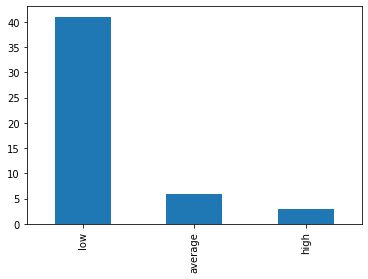

In [218]:
def changeFeatureValues(col):
   
    if(col["energy"] <0.33):
        col["energy"]= "low"
    elif(0.33 < col["energy"] < 0.66):
        col["energy"]= "average"
    else:
        col["energy"]= "high"
   
    if(col["acousticness"] <0.33):
        col["acousticness"]= "low"
    elif(0.33 < col["acousticness"] < 0.66):
        col["acousticness"]= "average"
    else:
        col["acousticness"]= "high"
        
    if( col["danceability"] <0.33):
         col["danceability"]= "low"
    elif(0.33 <  col["danceability"]  < 0.66):
         col["danceability"]="average"
    else:
         col["danceability"]= "high"
            
    if(col["liveness"] >0.8):
        col["liveness"]= "high"
    else:
        col["liveness"]= "low"
        
        
    if(col["speechiness"] <0.33):
            col["speechiness"]= "low"
    elif(0.33 < col["speechiness"]  < 0.66):
            col["speechiness"]= "average"
    else:
            col["speechiness"]= "high"
            
    if(col["instrumentalness"] <0.5):
            col["instrumentalness"]= "low"
    else:
            col["instrumentalness"]= "high"
    
    
    if(col["valence"] <0.33):
        col["valence"]= "low"
    elif(0.33 < col["valence"] < 0.66):
        col["valence"]= "average"
    else:
        col["valence"]= "high"
    
    return col
    
    
credentials = oauth2.SpotifyClientCredentials(
        client_id="daee064121c042429033426b80cfacde",
        client_secret="4fe548d57d3940a3bb0245f7d82d7495")

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)
topMexico = spotify.search("Mexico Top 50", offset=1, type='playlist')
actualPlaylist = {key:value for key, value in topMexico['playlists']['items'][0].items()}
tracks = spotify.user_playlist_tracks('spotify',actualPlaylist['id'])
tracksInfo = [track['track'] for track in tracks['items']]
for track in range(len(tracksInfo)):
    for key,value in tracksInfo[track]["album"].items():
        if(key=="name"):
            tracksInfo[track]["album"]=tracksInfo[track]['album']['name']
    tempArtists = []
    tempArtistsGenres = []
    for artist in range(len(tracksInfo[track]["artists"])):
        
        for key,value in tracksInfo[track]["artists"][artist].items():
            if(key=="id"):
                auxArtist = spotify.artist(tracksInfo[track]['artists'][artist]['id'])
                tempArtistsGenres.append(",".join(auxArtist['genres']))
                
            if(key=="name"):
                tempArtists.append(tracksInfo[track]['artists'][artist]['name'])

    tracksInfo[track]["artists"]=",".join(tempArtists)
    tracksInfo[track]["genres"]=" ".join(tempArtistsGenres)

tracksIds = [t['id'] for t in tracksInfo]
tracksFeatures = spotify.audio_features(tracksIds)

tracksDF =pd.DataFrame(tracksInfo)
tracksFeaturesDF =pd.DataFrame(tracksFeatures)

fullTrackInfo = pd.concat([tracksDF,tracksFeaturesDF],axis=1)
fullTrackInfo = fullTrackInfo.drop(['episode','tempo','time_signature', 'disc_number','preview_url','analysis_url','type','uri','loudness','external_ids','track_number','track','external_urls','href','id','track_href','mode','is_local','key','duration_ms'], axis=1)

modifiedFullTrack = fullTrackInfo.apply(lambda x: changeFeatureValues(x),axis=1)
acoustic_plot=modifiedFullTrack['acousticness'].value_counts().plot.bar()
acoustic_plot

#modifiedFullTrack.head(50)

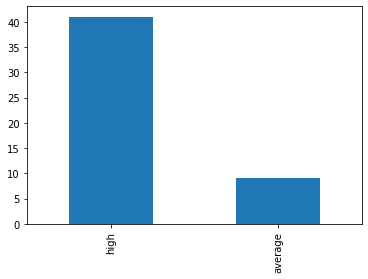

In [217]:

dance_plot=modifiedFullTrack['danceability'].value_counts().plot.bar()
dance_plot


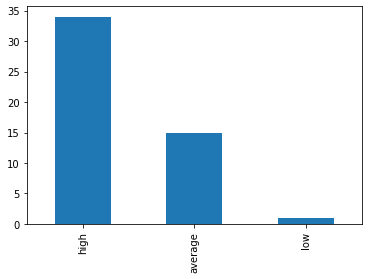

In [211]:
energy_plot=modifiedFullTrack['energy'].value_counts().plot.bar()
energy_plot


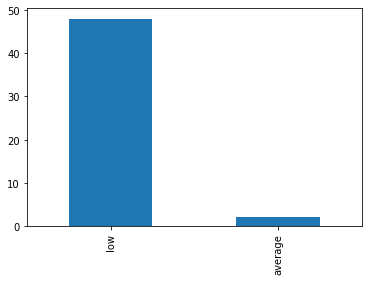

In [213]:

speech_plot=modifiedFullTrack['speechiness'].value_counts().plot.bar()
speech_plot


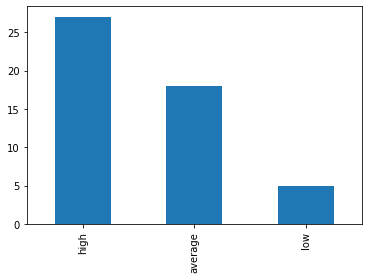

In [209]:

valence_plot=modifiedFullTrack['valence'].value_counts().plot.bar()
valence_plot


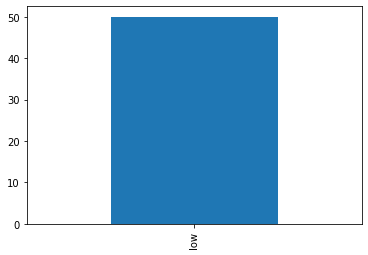

In [208]:

instrum_plot=modifiedFullTrack['instrumentalness'].value_counts().plot.bar()
instrum_plot


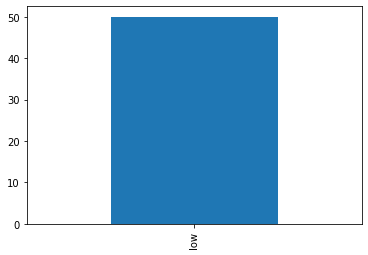

In [207]:
live_plot=modifiedFullTrack['liveness'].value_counts().plot.bar()
live_plot

In [219]:
modifiedFullTrack.head(50)

,album,artists,available_markets,explicit,genres,name,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,RITMO (Bad Boys For Life),"The Black Eyed Peas,J Balvin","[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",False,"dance pop,pop,pop rap latin,reggaeton",RITMO (Bad Boys For Life),91,low,high,high,low,low,low,high
1,OASIS,"J Balvin,Bad Bunny","[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",False,"latin,reggaeton reggaeton,trap latino",LA CANCIÓN,94,low,high,average,low,low,low,average
2,Callaita,"Bad Bunny,Tainy","[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",True,"reggaeton,trap latino pop reggaeton",Callaita,94,average,average,average,low,low,low,low
3,I Got It,Sanna Martinez,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",False,,I Got It,51,low,high,high,low,low,low,high
4,China,"Anuel AA,Daddy Yankee,KAROL G,J Balvin,Ozuna","[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",False,"reggaeton flow,trap latino latin,latin hip hop...",China,97,low,high,high,low,low,low,average
5,Famouz,"Jhay Cortez,J Balvin,Bad Bunny","[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",False,"reggaeton,reggaeton flow,trap latino latin,reg...",No Me Conoce - Remix,88,low,high,high,low,low,low,average
6,Running Wild (Remixes),"SINNAH,Lash","[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",False,,Running Wild - Lash Remix,34,low,high,high,low,low,low,average
7,Lose You To Love Me,Selena Gomez,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",False,"dance pop,pop,post-teen pop",Lose You To Love Me,97,average,average,average,low,low,low,low
8,Dance Monkey,Tones and I,"[AU, NZ]",False,australian pop,Dance Monkey,82,high,high,average,low,low,low,average
9,Septembers,Lidnesty,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",True,,DRKR,52,low,average,high,low,low,low,average


In [220]:
modifiedFullTrack.to_csv("results.csv")